One-Hot Encoded Genres:
                                 adventure  animation  comedy  drama  family  \
Name                                                                           
The Tale of The Princess Kaguya          0          1       0      1       0   
The Wind Rises                           0          1       0      1       0   
From Up on Poppy Hill                    0          1       0      1       0   
The Secret World of Arrietty             0          1       0      0       1   
Ponyo                                    0          1       0      0       1   

                                 fantasy  romance  war  
Name                                                    
The Tale of The Princess Kaguya        1        0    0  
The Wind Rises                         0        1    0  
From Up on Poppy Hill                  0        0    0  
The Secret World of Arrietty           1        0    0  
Ponyo                                  1        0    0  


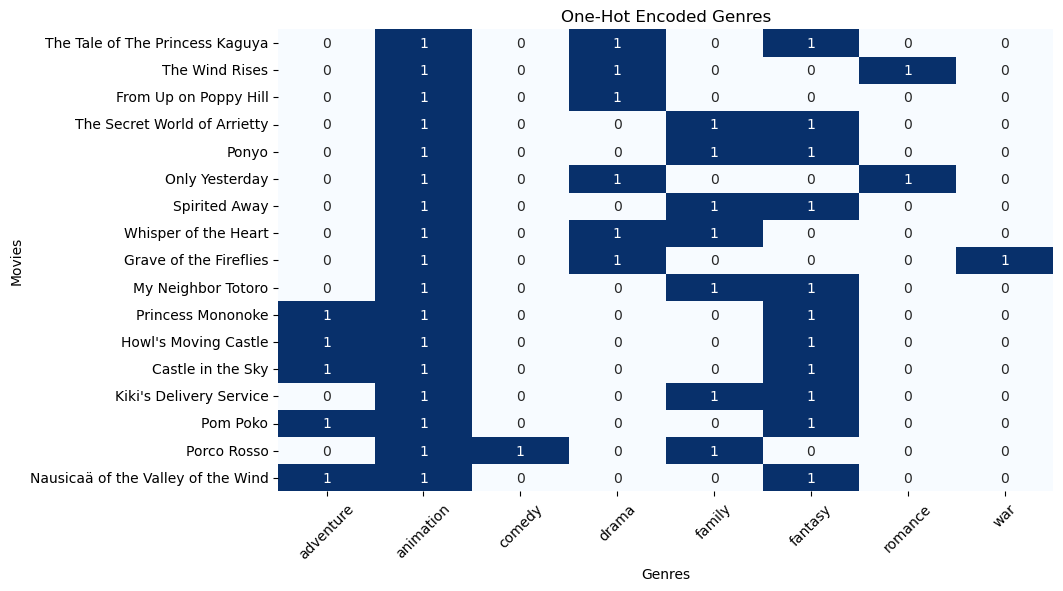

In [89]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


movies = pd.read_csv('prepared_genres.csv')

# Use CountVectorizer for one-hot encoding of the Genres column
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), token_pattern=None)  # Set token_pattern=None
genre_matrix = vectorizer.fit_transform(movies['Genres'])

# Get the feature names (unique genres) for clarity
unique_genres = vectorizer.get_feature_names_out()

# Convert the matrix to a dense DataFrame for better visibility
genre_df = pd.DataFrame(genre_matrix.toarray(), columns=unique_genres, index=movies['Name'])

print("One-Hot Encoded Genres:")
print(genre_df.head())

# Visualize the one-hot encoded data as a heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(genre_df, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title("One-Hot Encoded Genres")
plt.xlabel("Genres")
plt.ylabel("Movies")
plt.xticks(rotation=45) 
plt.show()


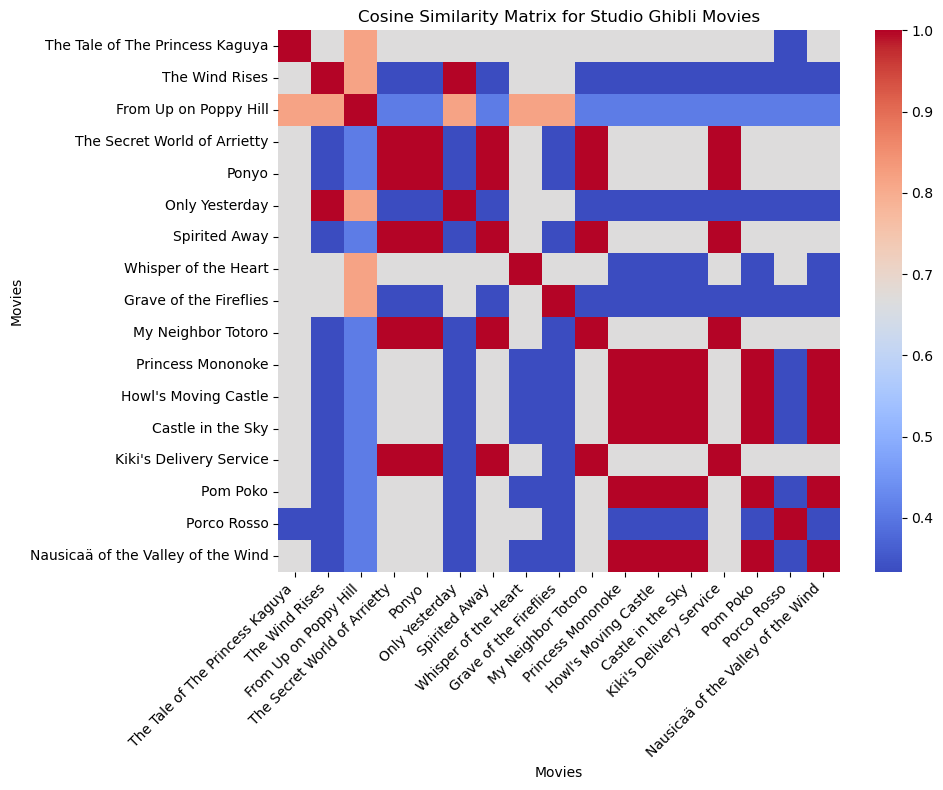

In [91]:
# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(genre_matrix)

# Create a DataFrame for cosine similarity with movie names as labels
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['Name'], columns=movies['Name'])

# Save the cosine similarity matrix to a CSV file
cosine_sim_df.to_csv('cosine_similarity_matrix_genres.csv', index=True)

# Visualize the cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, cmap='coolwarm', annot=False, xticklabels=True, yticklabels=True)
plt.title("Cosine Similarity Matrix for Studio Ghibli Movies")
plt.xlabel("Movies")
plt.ylabel("Movies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [96]:
def recommend_movies_with_scores(movie_title, similarity_matrix, movie_names, top_n=5):
    """
    Recommends movies based on cosine similarity scores along with their similarity values.
    
    Parameters:
        movie_title (str): The title of the movie for which to find similar movies.
        similarity_matrix (pd.DataFrame): The cosine similarity matrix.
        movie_names (list): List of movie names corresponding to the rows/columns of the similarity matrix.
        top_n (int): The number of recommendations to return (default is 5).
        
    Returns:
        pd.DataFrame: A DataFrame with movie recommendations and their similarity scores.
    """
    if movie_title not in movie_names:
        return f"Movie '{movie_title}' not found in the database."

    # Get the index of the movie
    movie_idx = movie_names.index(movie_title)

    # Get similarity scores for the given movie
    similarity_scores = similarity_matrix[movie_idx]

    # Sort scores in descending order and exclude the movie itself (index 0)
    similar_movies = sorted(
        [(movie_names[i], similarity_scores[i]) for i in range(len(similarity_scores)) if i != movie_idx],
        key=lambda x: x[1],
        reverse=True
    )

    # Get the top N similar movies and their cosine similarity scores
    top_movies_with_scores = similar_movies[:top_n]

    # Create a DataFrame for the recommendations and their similarity scores
    recommendations_df = pd.DataFrame(top_movies_with_scores, columns=["Recommended Movies", "Cosine Similarity"])
    
    return recommendations_df

# Load the cosine similarity matrix from the saved CSV file
cosine_sim_df = pd.read_csv('cosine_similarity_matrix_genres.csv', index_col=0)

# Get the movie names
movie_names = cosine_sim_df.index.tolist()

# Test the recommendation function for three movies: "My Neighbor Totoro", "Howl's Moving Castle", "Kiki's Delivery Service"
recommendations_totoro = recommend_movies_with_scores("My Neighbor Totoro", cosine_sim_df.values, movie_names, top_n=5)
recommendations_howl = recommend_movies_with_scores("Howl's Moving Castle", cosine_sim_df.values, movie_names, top_n=5)
recommendations_kiki = recommend_movies_with_scores("Kiki's Delivery Service", cosine_sim_df.values, movie_names, top_n=5)

# Save the results to separate CSV files
recommendations_totoro.to_csv('totoro_content_based.csv', index=False)
recommendations_howl.to_csv('howl_content_based.csv', index=False)
recommendations_kiki.to_csv('kiki_content_based.csv', index=False)
